In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, Flatten, Reshape, Dropout, Conv2D, MaxPooling2D
from keras.models import Model
from sys import exit

In [2]:
img_rows = img_cols = 28
mnist = not True
flatten = not True
reshape = True
pathToData = 'mnistemnist/'
num_classes = 36
epochs = 5 
fn_model = pathToData + 'lk3.h5'
# 
pathToHistory = 'mnistemnist/'
suff = '.txt'
# Имена файлов, в которые сохраняется история обучения 
fn_loss = pathToHistory + 'loss_' + suff
fn_acc = pathToHistory + 'acc_' + suff
fn_val_loss = pathToHistory + 'val_loss_' + suff
fn_val_acc = pathToHistory + 'val_acc_' + suff

In [3]:
def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color='r', label=lb, linestyle='--')
    plt.plot(val_loss_acc, color='g', label=lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()

In [4]:
def loadBinData(pathToData, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(pathToData + 'imagesTrain_mnist.bin', 'rb') as read_binary:
        x_train1 = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTrain_mnist.bin', 'rb') as read_binary:
        y_train1 = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'imagesTest_mnist.bin', 'rb') as read_binary:
        x_test1 = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTest_mnist.bin', 'rb') as read_binary:
        y_test1 = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'imagesTrain_emnist.bin', 'rb') as read_binary:
        x_train2 = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTrain_emnist.bin', 'rb') as read_binary:
        y_train2 = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'imagesTest_emnist.bin', 'rb') as read_binary:
        x_test2 = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTest_emnist.bin', 'rb') as read_binary:
        y_test2 = np.fromfile(read_binary, dtype=np.uint8)
        # Преобразование целочисленных данных в float32 и нормализация; данные лежат в диапазоне [0.0, 1.0]
    x_train1 = np.array(x_train1, dtype='float32') / 255
    x_test1 = np.array(x_test1, dtype='float32') / 255
    x_train2 = np.array(x_train2, dtype='float32') / 255
    x_test2 = np.array(x_test2, dtype='float32') / 255
    x_train1 = x_train1.reshape(-1, img_rows, img_cols)
    x_test1 = x_test1.reshape(-1, img_rows, img_cols)
    x_train2 = x_train2.reshape(-1, img_rows, img_cols, 1).transpose(0, 2, 1, 3)
    x_test2 = x_test2.reshape(-1, img_rows, img_cols, 1).transpose(0, 2, 1, 3)
    print('Преобразуем массивы меток в категориальное представление')
    y_train2 -= 1
    y_train1 += 26
    y_test2 -= 1
    y_test1 += 26
    y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
    y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)
    y_train2 = tf.keras.utils.to_categorical(y_train2, num_classes)
    y_test2 = tf.keras.utils.to_categorical(y_test2, num_classes)
    x_train1 = np.expand_dims(x_train1, axis = 3)
    x_test1 = np.expand_dims(x_test1, axis = 3)
    # x_train2 = np.expand_dims(x_train2, axis = 3)
    # x_test2 = np.expand_dims(x_test2, axis = 3)
    x_train = np.concatenate((x_train1, x_train2), axis = 0)
    y_train = np.concatenate((y_train1, y_train2), axis = 0)
    x_test = np.concatenate((x_test1, x_test2), axis = 0)
    y_test = np.concatenate((y_test1, y_test2), axis = 0)
    # print(y_train[0]) # (MNIST) Напечатает: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    # x_train = np.expand_dims(x_train, axis = 3)
    # x_test = np.expand_dims(x_test, axis = 3)
    print(y_train.shape)
    print(x_train.shape)
    print(y_test.shape)
    print(x_test.shape)
    return x_train, y_train, x_test, y_test

In [5]:
x_train, y_train, x_test, y_test = loadBinData(pathToData, img_rows, img_cols)

Загрузка данных из двоичных файлов...
Преобразуем массивы меток в категориальное представление
(184800, 36)
(184800, 28, 28, 1)
(30800, 36)
(30800, 28, 28, 1)


In [6]:
# Определяем форму входных данных 
input_shape = (img_rows, img_cols, 1)
# 
# Создание модели нейронной сети 
inp = Input(shape = input_shape) # Входной слой 
x = inp 
x = Flatten()(x) # Преобразование 2D в 1D 
x = Dense(units = 32, activation = 'relu')(x) 
output = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = inp, outputs = output) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1188      
Total params: 26,308
Trainable params: 26,308
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Определяем форму входных данных 
# 
# Создание модели нейронной сети 
model = tf.keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Reshape((-1, )),
    # Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes,  activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
reshape (Reshape)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                9252      
Total params: 1,615,460
Trainable params: 1,615,460
Non-trainable params: 0
______________________________________________

In [7]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
import time 
start = time.time() 
history = model.fit(x_train, y_train, batch_size=256, epochs=epochs,
                    verbose=2, validation_data=(x_test, y_test))
print('Время вычислений:', time.time() - start)
print('Модель сохранена в файле', fn_model)
model.save(fn_model)

Epoch 1/5
722/722 - 190s - loss: 0.8472 - accuracy: 0.7469 - val_loss: 0.3346 - val_accuracy: 0.9001
Epoch 2/5
722/722 - 197s - loss: 0.4186 - accuracy: 0.8709 - val_loss: 0.2487 - val_accuracy: 0.9237
Epoch 3/5
722/722 - 189s - loss: 0.3420 - accuracy: 0.8939 - val_loss: 0.2224 - val_accuracy: 0.9312
Epoch 4/5
722/722 - 192s - loss: 0.3029 - accuracy: 0.9050 - val_loss: 0.2085 - val_accuracy: 0.9346
Epoch 5/5
722/722 - 185s - loss: 0.2782 - accuracy: 0.9114 - val_loss: 0.1968 - val_accuracy: 0.9379
Время вычислений: 956.9021937847137
Модель сохранена в файле mnistemnist/lk3.h5


In [9]:
history = history.history
## for itm in history.items(): print(itm)
with open(fn_loss, 'w') as output:
    for val in history['loss']: output.write(str(val) + '\n')
with open(fn_acc, 'w') as output:
    for val in history['accuracy']: output.write(str(val) + '\n')
with open(fn_val_loss, 'w') as output:
    for val in history['val_loss']: output.write(str(val) + '\n')
with open(fn_val_acc, 'w') as output:
    for val in history['val_accuracy']: output.write(str(val) + '\n')

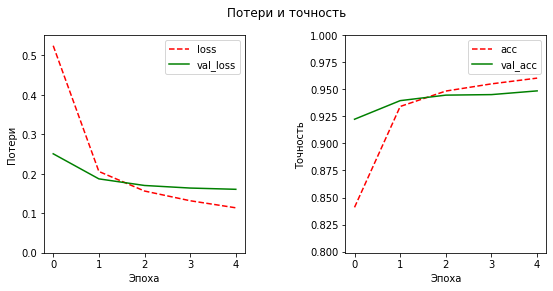

In [10]:
# Вывод графиков обучения
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()

In [12]:
pred = model.predict(x_train)
predicted_classes = np.array([np.argmax(m) for m in pred])
import string
letters = list(string.ascii_uppercase)
predicted_classes = [letters[m] for m in predicted_classes]
l = len(predicted_classes)

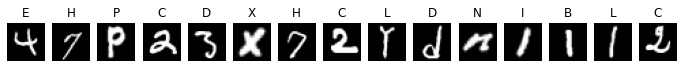

In [13]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    j = np.random.randint(0, high=l, dtype=int)
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title(predicted_classes[j])
    plt.imshow(x_train[j], cmap='gray')
plt.show()

In [11]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
mask = []
for i in range(len(pred)): 
    mask.append(pred[i] == np.argmax(y_test[i]))
x_false = []
for i in range(len(x_test)):
    if not mask[i]:
        x_false.append(x_test[i])
preds_incorrect = []
for i in range(len(x_test)):
    if not mask[i]:
        preds_incorrect.append(pred[i])
y_test_true = []
for i in range(len(x_test)):
    if not mask[i]:
        y_test_true.append(y_test[i])

In [12]:
i = 1
k = 0
acc = []
tmp_acc = 0
for j in range(10000):
    if mask[j]:
        tmp_acc += 1
    if j == (999 * i) + k:
        i += 1
        k += 1
        acc.append((tmp_acc * 100) / 1000)
        tmp_acc = 0
print(acc)

[98.3, 98.5, 97.4, 98.3, 98.6, 99.2, 99.1, 99.9, 99.6, 98.9]


In [13]:
l = len(y_test)
i = 1
k = 0
acc = []
tmp_acc = 0
for j in range(10000, l):
    if mask[j]:
        tmp_acc += 1
    if j == 10000 + (799 * i) + k:
        i += 1
        k += 1
        acc.append((tmp_acc * 100) / 800)
        tmp_acc = 0
print(acc)

[93.125, 95.375, 97.75, 92.875, 91.125, 96.625, 86.625, 93.75, 85.0, 94.375, 93.25, 64.125, 97.125, 97.25, 98.25, 96.5, 79.125, 95.375, 96.875, 97.75, 90.75, 95.375, 98.625, 95.625, 96.375, 98.5]


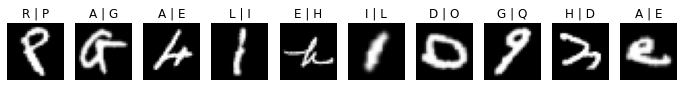

In [20]:
import string
letters = list(string.ascii_uppercase)
l = len(y_test_true)
f = plt.figure(figsize=(12,5))
for i in range(10):
    j = np.random.randint(0, high=l, dtype=int)
    sp = f.add_subplot(1,10,i+1)
    sp.axis('Off')
    sp.set_title("{} | {}".format(letters[preds_incorrect[j]], letters[np.argmax(y_test_true[j])]))
    plt.imshow(x_false[j], 'gray')

plt.show()